Author: Alexander Kunze

In [72]:
import nltk  #Natural Language Toolkit
import numpy as np #Mathematische Funktionen
import pandas as pd #Textverarbeitung
import matplotlib.pyplot as plt #plotten

#Stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [36]:
artikel_prom = pd.read_csv("promotional.csv")
artikel_good = pd.read_csv("good.csv")
label_prom = ['advert','coi', 'fanpov', 'pr', 'resume']

  Sub-Label  Anzahl der Artikel  Prozentsatz
0    advert               18911    79.334648
1       coi                2142     8.986030
2    fanpov                1496     6.275958
3        pr                1516     6.359861
4    resume                2198     9.220959


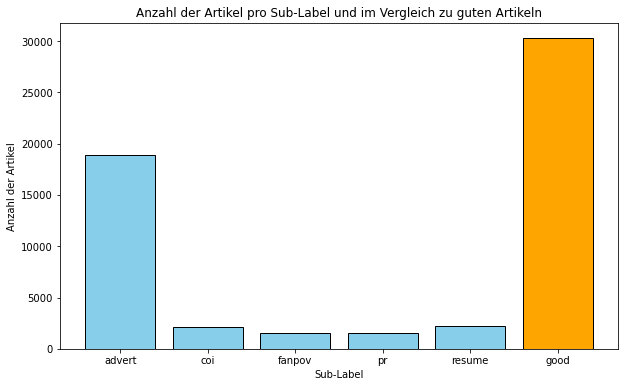

In [66]:
#Vergleich Anzahl der Artikel

# Zählen der Artikel pro Sub-Label, die den Wert 1 haben
prom_counts = {label: artikel_prom[artikel_prom[label] == 1].shape[0] for label in label_prom}

# Zäheln der Artikel von guten Artikeln
good_counts = len(artikel_good)

# Umwandeln in einen DataFrame für eine bessere Darstellung
prom_counts_df = pd.DataFrame(list(prom_counts.items()), columns=['Sub-Label', 'Anzahl der Artikel'])

# Berechnung des Prozentsatzes
prom_counts_df['Prozentsatz'] = (prom_counts_df['Anzahl der Artikel'] / len(artikel_prom)) * 100

# Ausgabe der Ergebnisse
print(prom_counts_df)

# Optional: Balkendiagramm zur Visualisierung des Verhältnisses
plt.figure(figsize=(10,6))
plt.bar(prom_counts_df['Sub-Label'], prom_counts_df['Anzahl der Artikel'], color='skyblue', edgecolor='black')
plt.bar('good', good_counts, color='orange', edgecolor='black', label='Good')
plt.title('Anzahl der Artikel pro Sub-Label und im Vergleich zu guten Artikeln')
plt.xlabel('Sub-Label')
plt.ylabel('Anzahl der Artikel')
plt.show()


In [60]:
#Untersuchung bzgl. Wordcount

#Hinzufügen von Wordcount
artikel_prom['wordcount'] = artikel_prom['text'].apply(lambda x:len(str(x).split()))
artikel_good['wordcount'] = artikel_prom['text'].apply(lambda x:len(str(x).split()))

In [61]:
artikel_prom.head()

,text,advert,coi,fanpov,pr,resume,url,wordcount
0,"1 Litre no Namida 1, lit. 1 Litre of Tears als...",0,0,1,0,0,https://en.wikipedia.org/wiki/1%20Litre%20no%2...,617
1,"1DayLater was free, web based software that wa...",1,1,0,0,0,https://en.wikipedia.org/wiki/1DayLater,255
2,1E is a privately owned IT software and servic...,1,0,0,0,0,https://en.wikipedia.org/wiki/1E,869
3,1Malaysia pronounced One Malaysia in English a...,1,0,0,0,0,https://en.wikipedia.org/wiki/1Malaysia,1796
4,"The Jerusalem Biennale, as stated on the Bienn...",1,0,0,0,0,https://en.wikipedia.org/wiki/1st%20Jerusalem%...,195


In [62]:
#Statistische Untersuchung des Wordcounts
for label in label_prom:
    print(f"Statistische Analyse für das Unterlabel '{label}':")
    stats = artikel_prom.groupby(label)['wordcount'].describe()
    print(stats)
    print("\n")

Statistische Analyse für das Unterlabel 'advert':
          count        mean          std  min    25%    50%    75%      max
advert                                                                     
0        4926.0  901.464677  1524.579527  6.0  273.0  505.0  934.0  26213.0
1       18911.0  733.577865   843.529361  9.0  267.0  496.0  881.0  12003.0


Statistische Analyse für das Unterlabel 'coi':
       count        mean          std  min    25%    50%     75%      max
coi                                                                      
0    21695.0  775.559253  1051.570962  6.0  267.0  497.0  893.00  26213.0
1     2142.0  694.466853   687.078696  9.0  277.0  500.0  871.75   7551.0


Statistische Analyse für das Unterlabel 'fanpov':
          count         mean          std  min     25%    50%     75%      max
fanpov                                                                        
0       22341.0   718.928472   826.385021  6.0  265.00  487.0   864.0  13122.0
1        149

In [63]:
print(f"Statistische Analyse für gute Artikel:")
stats = artikel_good['wordcount'].describe()
print(stats)
print("\n")

Statistische Analyse für gute Artikel:
count    23837.000000
mean       768.272266
std       1024.387853
min          6.000000
25%        268.000000
50%        498.000000
75%        891.000000
max      26213.000000
Name: wordcount, dtype: float64




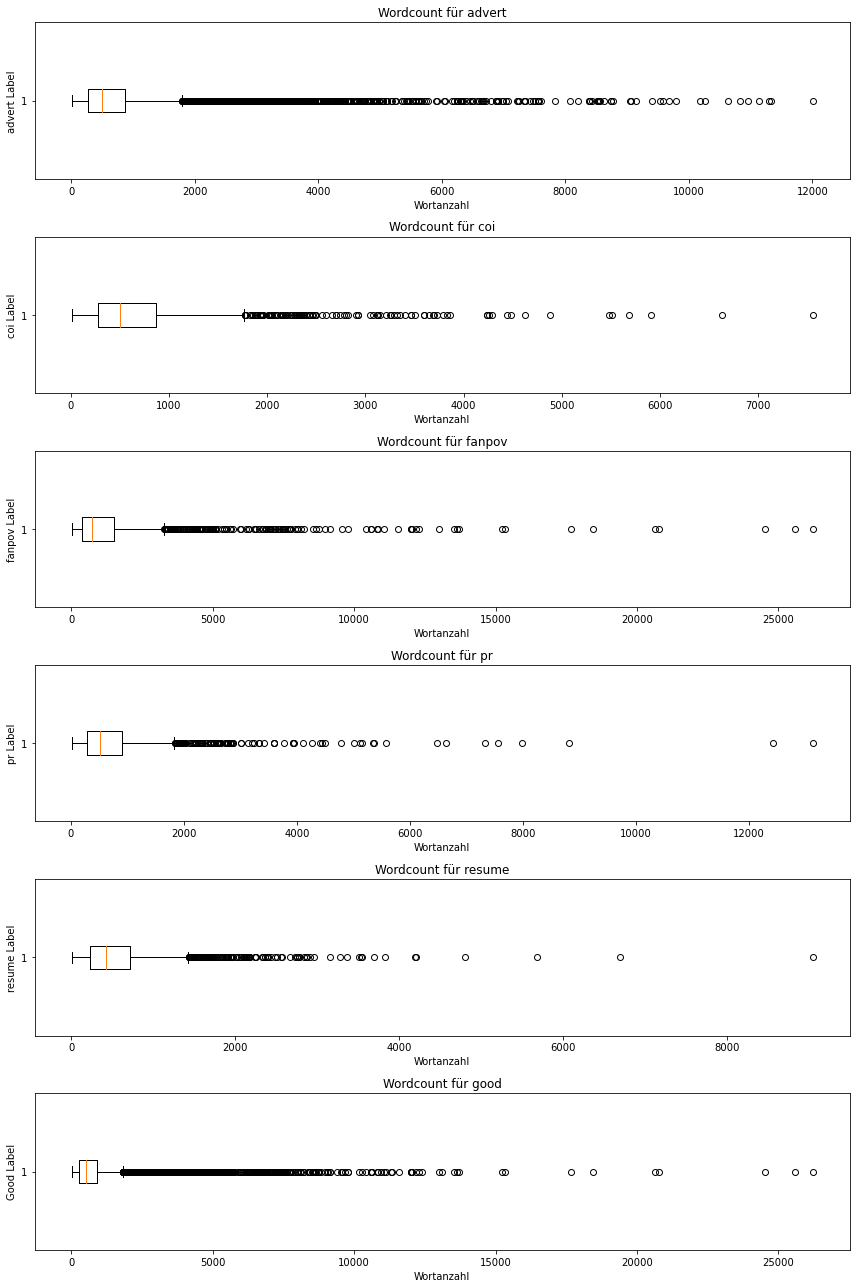

In [67]:
# Erstellen eines 6x1 Subplots-Rasters
fig, axs = plt.subplots(6, 1, figsize=(12, 18))

# Boxplots für die Sub-Labels erstellen
for i, label in enumerate(label_prom):
    axs[i].boxplot(artikel_prom[artikel_prom[label] == 1]['wordcount'], vert=False)
    axs[i].set_title(f'Wordcount für {label}')
    axs[i].set_xlabel('Wortanzahl')
    axs[i].set_ylabel(f'{label} Label')

# Boxplot für gute Artikel (label == 'good')
axs[5].boxplot(artikel_prom['wordcount'], vert=False)
axs[5].set_title('Wordcount für good')
axs[5].set_xlabel('Wortanzahl')
axs[5].set_ylabel('Good Label')

# Platzierung und Layout anpassen
plt.tight_layout()

# Plots anzeigen
plt.show()


In [69]:
# Liste der englischen Stopwords laden
stop_words = set(stopwords.words('english'))

In [98]:
def stopwords_entfernen(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return " ".join(filtered_text)

artikel_prom['text_clean'] = artikel_prom['text'].apply(stopwords_entfernen)
artikel_good['text_clean'] = artikel_good['text'].apply(stopwords_entfernen)

In [99]:
artikel_prom['wordcount_clean'] = artikel_prom['text_clean'].apply(lambda x:len(str(x).split()))
artikel_good['wordcount_clean'] = artikel_good['text_clean'].apply(lambda x:len(str(x).split()))

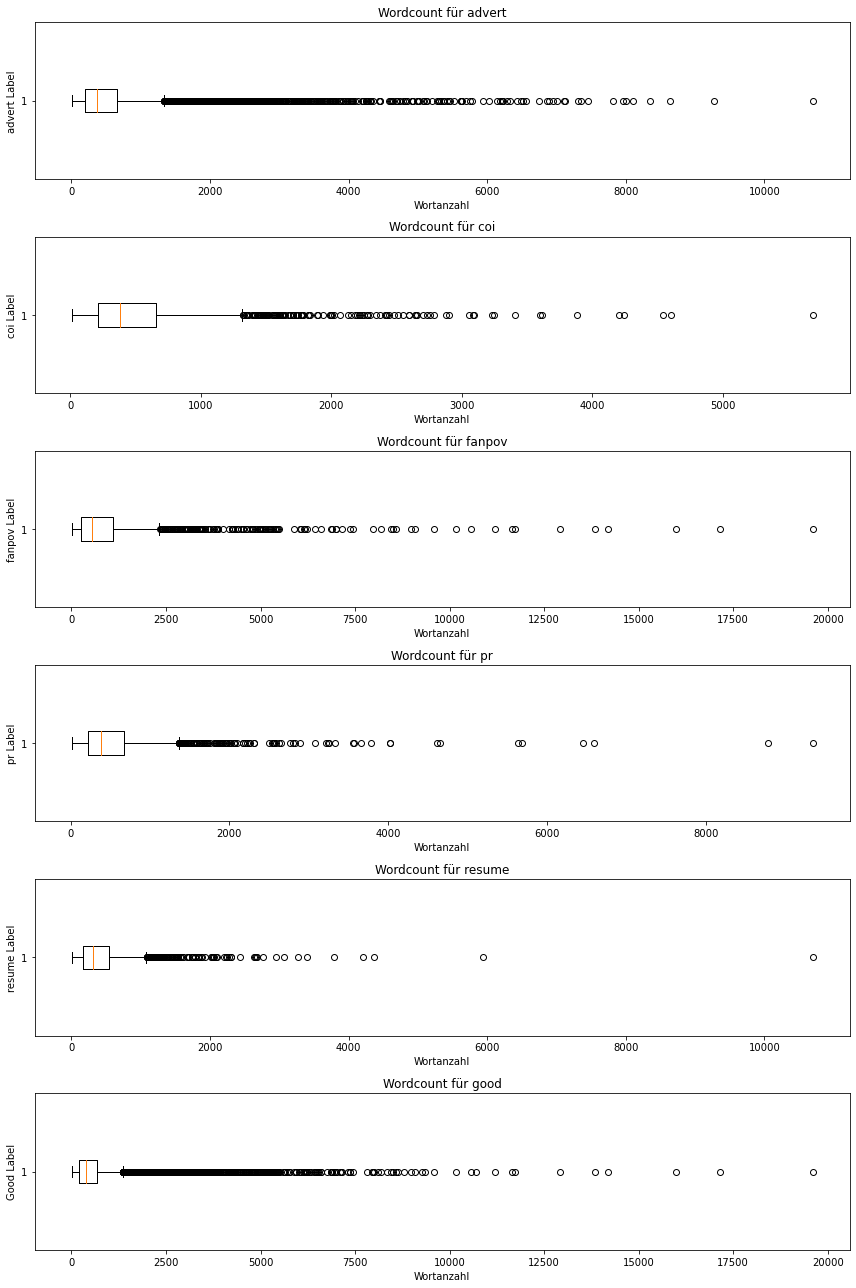

In [100]:
# Erstellen eines 6x1 Subplots-Rasters
fig, axs = plt.subplots(6, 1, figsize=(12, 18))

# Boxplots für die Sub-Labels erstellen
for i, label in enumerate(label_prom):
    axs[i].boxplot(artikel_prom[artikel_prom[label] == 1]['wordcount_clean'], vert=False)
    axs[i].set_title(f'Wordcount für {label}')
    axs[i].set_xlabel('Wortanzahl')
    axs[i].set_ylabel(f'{label} Label')

# Boxplot für gute Artikel (label == 'good')
axs[5].boxplot(artikel_prom['wordcount_clean'], vert=False)
axs[5].set_title('Wordcount für good')
axs[5].set_xlabel('Wortanzahl')
axs[5].set_ylabel('Good Label')

# Platzierung und Layout anpassen
plt.tight_layout()

# Plots anzeigen
plt.show()

In [101]:
artikel_prom['stopwords_anzahl'] = artikel_prom['wordcount'] - artikel_prom['wordcount_clean']
artikel_good['stopwords_anzahl'] = artikel_good['wordcount'] - artikel_good['wordcount_clean']

In [102]:
print(artikel_prom[['wordcount','wordcount_clean','stopwords_anzahl']].head())

   wordcount  wordcount_clean  stopwords_anzahl
0        617              438               179
1        255              189                66
2        869              667               202
3       1796             1298               498
4        195              170                25


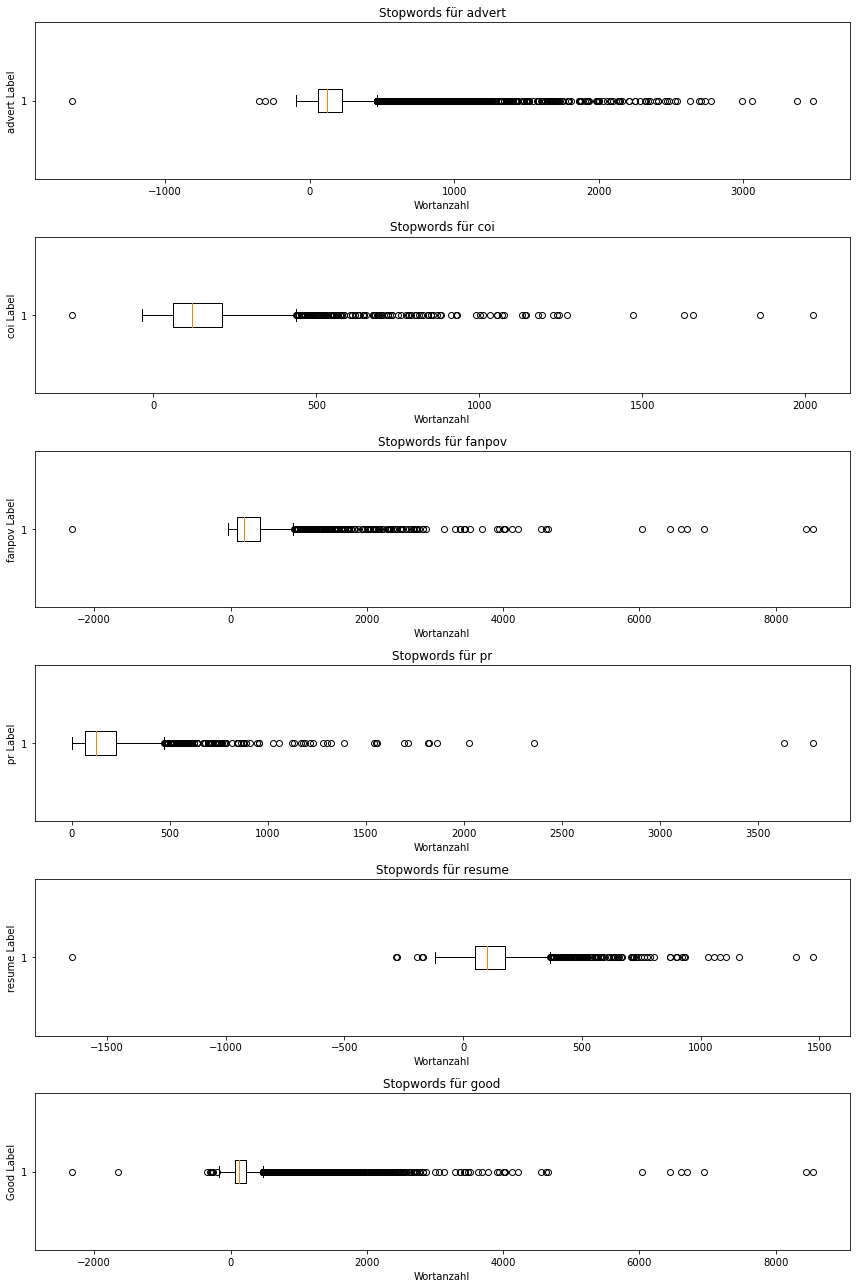

In [103]:
# Erstellen eines 6x1 Subplots-Rasters
fig, axs = plt.subplots(6, 1, figsize=(12, 18))

# Boxplots für die Sub-Labels erstellen
for i, label in enumerate(label_prom):
    axs[i].boxplot(artikel_prom[artikel_prom[label] == 1]['stopwords_anzahl'], vert=False)
    axs[i].set_title(f'Stopwords für {label}')
    axs[i].set_xlabel('Wortanzahl')
    axs[i].set_ylabel(f'{label} Label')

# Boxplot für gute Artikel (label == 'good')
axs[5].boxplot(artikel_prom['stopwords_anzahl'], vert=False)
axs[5].set_title('Stopwords für good')
axs[5].set_xlabel('Wortanzahl')
axs[5].set_ylabel('Good Label')

# Platzierung und Layout anpassen
plt.tight_layout()

# Plots anzeigen
plt.show()

In [104]:
print(artikel_prom[artikel_prom['stopwords_anzahl']<0])

                                                    text  advert  coi  fanpov  \
106    Ahmad Aali Persian , born 1935 in Tabriz is an...       1    0       0   
173    ACD Systems is an independent digital image ed...       1    0       0   
1137   The Arihant Education Foundation was establish...       1    0       0   
1242   ASG Technologies Group, Inc. dba ASG Technolog...       1    0       0   
1327   Aster MIMS full name Aster Malabar Institute o...       1    0       0   
...                                                  ...     ...  ...     ...   
22358  Vicor Corporation, headquartered in Andover, M...       1    0       0   
22914  The West Kortright Centre is a non profit arts...       1    0       0   
23403  X cite by Alghanim Electronics part of Alghani...       1    0       0   
23633  YRF Distribution is the domestic distribution ...       1    0       0   
23771  Marian Zidaru born August 22, 1956, Balotesti,...       0    0       0   

       pr  resume          

In [105]:
artikel_prom.loc[106, ['text', 'text_clean']]

text          Ahmad Aali Persian , born 1935 in Tabriz is an...
text_clean    Ahmad Aali Persian , born 1935 Tabriz Iranian ...
Name: 106, dtype: object